## Dependencies


In [22]:
from google.cloud import bigquery
import os
import pandas as pd
from pyarrow import json
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

## Part 3

The last part goal is to analyze the matchStart table


### Amount of matchStart events per player in 25/50/75 percentiles

You can access the Viz from [HERE](https://public.tableau.com/app/profile/omar.banat/viz/Percentiles_16457850827290/Sheet1) 

In [103]:
credentials_path = "C:/Users/HP/Desktop/bigquery_creds.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credentials_path

bq_project = "ng-bq-test"
bq_dataset = "ng_test"
client = bigquery.Client(project=bq_project)
dataset_ref = client.dataset(bq_dataset)


sql_query = """
WITH A AS (
SELECT COUNT(eventUUID) AS NUMBER_OF_EVENTS, userID as PLAYER
FROM `ng-bq-test.ng_test.matchStart_omar`
GROUP BY userID
order by COUNT(eventUUID)
)

SELECT 
DISTINCT PLAYER, NUMBER_OF_EVENTS,
 PERCENTILE_CONT(NUMBER_OF_EVENTS, 0.25) OVER () AS PERCENTILE_25
,PERCENTILE_CONT(NUMBER_OF_EVENTS, 0.50) OVER () AS PERCENTILE_50
,PERCENTILE_CONT(NUMBER_OF_EVENTS, 0.75) OVER () AS PERCENTILE_75 

FROM A
"""

exec_query = client.query(sql_query)
result = exec_query.result()
table1 = result.to_dataframe()
table1


,PLAYER,NUMBER_OF_EVENTS,PERCENTILE_25,PERCENTILE_50,PERCENTILE_75
0,620daabcebeff071a1944a32,1,1.0,2.0,4.0
1,6209c156e0084945bdeafdb1,1,1.0,2.0,4.0
2,620edf5febeff071a19db5b0,4,1.0,2.0,4.0
3,6161b3f04ed396000f85b640,3,1.0,2.0,4.0
4,620fb3ac7f1a97e3a6d209b6,1,1.0,2.0,4.0
5,620fad1febeff071a1a4efeb,1,1.0,2.0,4.0
6,620fb0257f1a97e3a6d1917e,1,1.0,2.0,4.0
7,620dabaf7f1a97e3a6c0e9f6,1,1.0,2.0,4.0
8,61d5702858c463000e35352e,12,1.0,2.0,4.0
9,620e92cae59dd01f78b0fb40,17,1.0,2.0,4.0


### Amount of matchStart events by game mode (parameter named “gameMode”)



In [67]:
sql_query_2 = """

SELECT COUNT(eventUUID) AS NUMBER_OF_EVENTS, REPLACE(REPLACE(gameMode, '"',''),'GAMEMODE_','') as GAME_MODE
FROM `ng-bq-test.ng_test.matchStart_omar`
GROUP BY gameMode
"""

exec_query = client.query(sql_query_2)
result = exec_query.result()
table2 = result.to_dataframe()
table2

,NUMBER_OF_EVENTS,GAME_MODE
0,13,Siege
1,21,GemRush
2,77,NerfWar
3,28,FreeForAll
4,13,Ftue1stMatch
5,12,Ftue2ndMatch
6,3,Ftue3rdMatch


In [68]:
table2= table2.sort_values('NUMBER_OF_EVENTS',ascending=False).reset_index()


# The second Visualization 

[Text(0, 0, 'NerfWar'),
 Text(1, 0, 'FreeForAll'),
 Text(2, 0, 'GemRush'),
 Text(3, 0, 'Siege'),
 Text(4, 0, 'Ftue1stMatch'),
 Text(5, 0, 'Ftue2ndMatch'),
 Text(6, 0, 'Ftue3rdMatch')]

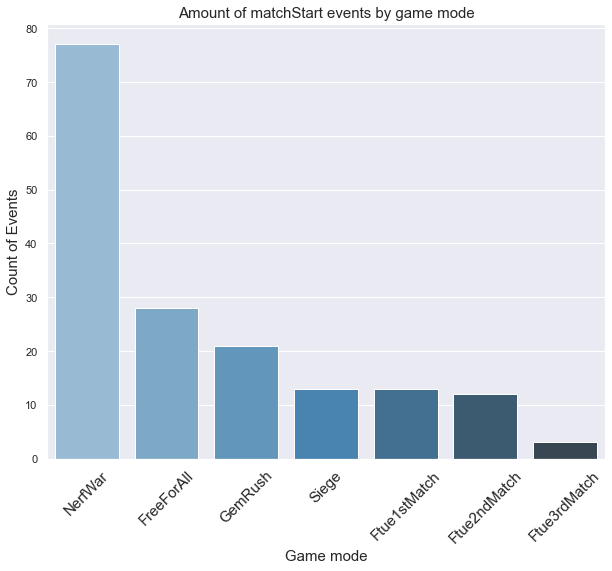

In [69]:

sns.set(font_scale = 2)
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('darkgrid')
viz_1=sns.barplot(x="GAME_MODE", y="NUMBER_OF_EVENTS", data=table2,
                 palette='Blues_d')
viz_1.set_title('Amount of matchStart events by game mode',size = 15)
viz_1.set_ylabel('Count of Events',size = 15)
viz_1.set_xlabel('Game mode',size = 15)
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45,size = 15)

### Top 3 most popular blasters in matchStart events (blasters are tracked in parameters called “blasterOne”, “blasterTwo” and “blasterThree”
You can access the Viz from [HERE](https://public.tableau.com/app/profile/omar.banat/viz/Blasters/Sheet1)



In [95]:
sql_query_3 = """
SELECT * FROM (
SELECT (count(eventUUID)) AS NUMBER_OF_EVENTS ,REPLACE(blasterOne, '"','') AS BLASTER_NAME, 'Blaster One' AS BLASTER_TYPE
FROM `ng-bq-test.ng_test.matchStart_omar`
WHERE REPLACE(blasterOne, '"','') IS NOT NULL
group by blasterOne
order by NUMBER_OF_EVENTS DESC LIMIT 3
)A

UNION ALL
SELECT * FROM (
SELECT (count(eventUUID)) AS NUMBER_OF_EVENTS ,REPLACE(blasterTwo, '"','') AS BLASTER_NAME, 'Blaster Two' AS BLASTER_TYPE
FROM `ng-bq-test.ng_test.matchStart_omar`
WHERE REPLACE(blasterTwo, '"','') IS NOT NULL
group by blasterTwo
order by NUMBER_OF_EVENTS DESC LIMIT 3
)B

UNION ALL
SELECT * FROM (
SELECT (count(eventUUID)) AS NUMBER_OF_EVENTS ,REPLACE(blasterThree, '"','') AS BLASTER_NAME, 'Blaster Three' AS BLASTER_TYPE
FROM `ng-bq-test.ng_test.matchStart_omar`
WHERE REPLACE(blasterThree, '"','') IS NOT NULL
group by blasterThree
order by NUMBER_OF_EVENTS DESC LIMIT 3
)C

"""

exec_query = client.query(sql_query_3)
result = exec_query.result()
table3 = result.to_dataframe()
table3

,NUMBER_OF_EVENTS,BLASTER_NAME,BLASTER_TYPE
0,75,WEAPON_COMMANDER_RD6,Blaster One
1,24,WEAPON_ECHO_CS10,Blaster One
2,14,WEAPON_DORADO,Blaster One
3,55,WEAPON_DORADO,Blaster Three
4,35,WEAPON_BULLDOG,Blaster Three
5,15,WEAPON_JOLT_EX1,Blaster Three
6,57,WEAPON_SHELLSTRIKE_DS6,Blaster Two
7,15,WEAPON_DORADO,Blaster Two
8,15,WEAPON_JUDGE,Blaster Two
